In [2]:
import pandas as pd

In [45]:
tissue = 'brain' # or pbmc
# tissue = "pbmc"
path_to_melted_df = f"/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/dev1/EGAD/melted_dfs/{tissue}_sc_with_metadata_cpm_pc.h5ad_melted_df.csv.gz"
path_to_curated_gos = "/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/preprocessing/preprocessGO_pipe/data/bp_curated_annotations.tsv"

In [46]:
df_brain_melted = pd.read_csv(path_to_melted_df, index_col = 0)

In [47]:
df_brain_melted

,index,tissue,variance,auc
0,GO:0000045,brain_sc_with_metadata_cpm_pc.h5ad,0.10,0.517417
1,GO:0000070,brain_sc_with_metadata_cpm_pc.h5ad,0.10,0.626228
2,GO:0000077,brain_sc_with_metadata_cpm_pc.h5ad,0.10,0.560107
3,GO:0000079,brain_sc_with_metadata_cpm_pc.h5ad,0.10,0.465628
4,GO:0000082,brain_sc_with_metadata_cpm_pc.h5ad,0.10,0.531302
...,...,...,...,...
4201,GO:2001237,brain_sc_with_metadata_cpm_pc.h5ad,0.01,0.487732
4202,GO:2001238,brain_sc_with_metadata_cpm_pc.h5ad,0.01,0.414256
4203,GO:2001240,brain_sc_with_metadata_cpm_pc.h5ad,0.01,0.476529
4204,GO:2001243,brain_sc_with_metadata_cpm_pc.h5ad,0.01,0.484275


In [54]:
curated_gos = pd.read_csv(path_to_curated_gos, sep = "\t")
curated_gos.fillna("F", inplace=True)

In [55]:
def combine_bootstraps_to_avg(melted_df:pd.DataFrame) -> pd.DataFrame:
    """Combine the performance of GO terms across bootstraps

    Args:
        melted_df (pd.DataFrame): df of data for aucs across many bootstraps
    """
    avg_performance = melted_df.groupby('index').mean()
    avg_performance = avg_performance['auc']
    return avg_performance
    

In [56]:
def combine_with_go_metadata(df_auc_performance:pd.DataFrame, go_cta_df:pd.DataFrame)-> pd.DataFrame:
    """Combine the GO metadata to our gene information

    Args:
        df_auc_performance (_type_): performance of go terms
        go_cta (_type_): cell type affiliation of go curations

    Returns:
        pd.DataFrame: _description_
    """
    
    merged_data = pd.merge(df_auc_performance, go_cta_df, how = 'left', left_on='index', right_on='id')
    return merged_data

brain_annotations = combine_with_go_metadata(df_auc_performance=df_brain_melted,
                                             go_cta_df=curated_gos)
brain_annotations

,index,tissue,variance,auc,id,name,namespace,CTAffiliated,BrainAffiliated,def
0,GO:0000045,brain_sc_with_metadata_cpm_pc.h5ad,0.10,0.517417,GO:0000045,autophagosome assembly,biological_process,F,F,The formation of a double membrane-bounded str...
1,GO:0000070,brain_sc_with_metadata_cpm_pc.h5ad,0.10,0.626228,GO:0000070,mitotic sister chromatid segregation,biological_process,F,F,The cell cycle process in which replicated hom...
2,GO:0000077,brain_sc_with_metadata_cpm_pc.h5ad,0.10,0.560107,GO:0000077,DNA damage checkpoint signaling,biological_process,F,F,A signal transduction process that contributes...
3,GO:0000079,brain_sc_with_metadata_cpm_pc.h5ad,0.10,0.465628,GO:0000079,regulation of cyclin-dependent protein serine/...,biological_process,F,F,"Any process that modulates the frequency, rate..."
4,GO:0000082,brain_sc_with_metadata_cpm_pc.h5ad,0.10,0.531302,GO:0000082,G1/S transition of mitotic cell cycle,biological_process,F,F,The mitotic cell cycle transition by which a c...
...,...,...,...,...,...,...,...,...,...,...
4201,GO:2001237,brain_sc_with_metadata_cpm_pc.h5ad,0.01,0.487732,GO:2001237,negative regulation of extrinsic apoptotic sig...,biological_process,F,F,"Any process that stops, prevents or reduces th..."
4202,GO:2001238,brain_sc_with_metadata_cpm_pc.h5ad,0.01,0.414256,GO:2001238,positive regulation of extrinsic apoptotic sig...,biological_process,F,F,Any process that activates or increases the fr...
4203,GO:2001240,brain_sc_with_metadata_cpm_pc.h5ad,0.01,0.476529,GO:2001240,negative regulation of extrinsic apoptotic sig...,biological_process,F,F,"Any process that stops, prevents or reduces th..."
4204,GO:2001243,brain_sc_with_metadata_cpm_pc.h5ad,0.01,0.484275,GO:2001243,negative regulation of intrinsic apoptotic sig...,biological_process,F,F,"Any process that stops, prevents or reduces th..."


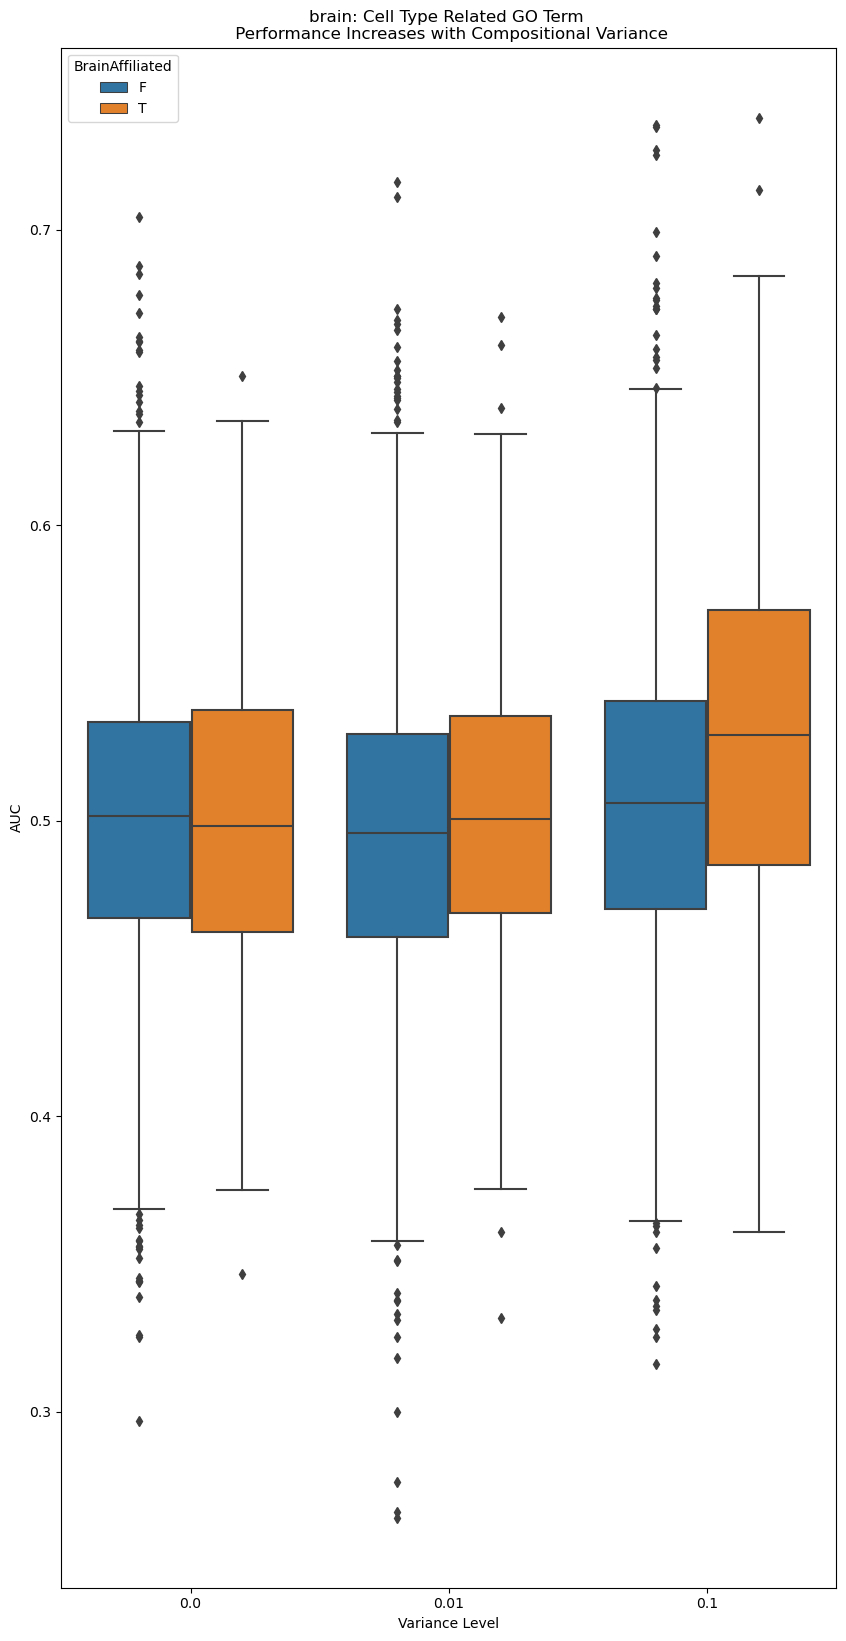

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the height of the figure
fig, ax = plt.subplots(figsize=(10, 20))
# Use Seaborn to create a histogram separated by color
sns.boxplot(data=brain_annotations, x='variance', y = 'auc', hue='BrainAffiliated', dodge=True)

# Set labels and title
plt.xlabel('Variance Level')
plt.ylabel('AUC')
plt.title(f'{tissue}: Cell Type Related GO Term \n Performance Increases with Compositional Variance')

# Show the plot
plt.show()

